In [1]:
# Mount the google drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Train the model (CIFAR10)

In [33]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

import torch.optim as optim

if __name__=='__main__':
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='/content/drive/My Drive/HKUST/MSBD5012/Assignment/cifar10/data', train=True,
                                        download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='/content/drive/My Drive/HKUST/MSBD5012/Assignment/cifar10/data', train=False,
                                       download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
                'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    net = Net()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    import time
    start_time = time.time()

    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Training time:', (time.time() - start_time))
    print('Finished Training')

    PATH = '/content/drive/My Drive/HKUST/MSBD5012/Assignment/cifar10.pth'
    torch.save(net, PATH)

    PATH2 = '/content/drive/My Drive/HKUST/MSBD5012/Assignment/cifar_net.pth'
    torch.save(net.state_dict(), PATH2)

    dataiter = iter(testloader)
    images, labels = dataiter.next()

    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH2))

    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

    print(device)

# %%%%%%INVISIBLE_CODE_BLOCK%%%%%%
    del dataiter
# %%%%%%INVISIBLE_CODE_BLOCK%%%%%%


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.252
[1,  4000] loss: 1.899
[1,  6000] loss: 1.678
[1,  8000] loss: 1.561
[1, 10000] loss: 1.532
[1, 12000] loss: 1.479
[2,  2000] loss: 1.381
[2,  4000] loss: 1.386
[2,  6000] loss: 1.361
[2,  8000] loss: 1.322
[2, 10000] loss: 1.292
[2, 12000] loss: 1.269
Training time: 141.239670753479
Finished Training
GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship
Accuracy of the network on the 10000 test images: 54 %
Accuracy of plane : 46 %
Accuracy of   car : 71 %
Accuracy of  bird : 24 %
Accuracy of   cat : 24 %
Accuracy of  deer : 38 %
Accuracy of   dog : 73 %
Accuracy of  frog : 64 %
Accuracy of horse : 65 %
Accuracy of  ship : 80 %
Accuracy of truck : 52 %
cpu


### Predict by using the model

In [ ]:
!pip install PIL

In [98]:
img = Image.open(f'/content/drive/My Drive/HKUST/MSBD5012/Assignment/images/1.png').convert('RGB')
img.size

(500, 334)

tensor([[0.0434, 0.0021, 0.1868, 0.0283, 0.5191, 0.0128, 0.1284, 0.0455, 0.0230,
         0.0105]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([4])


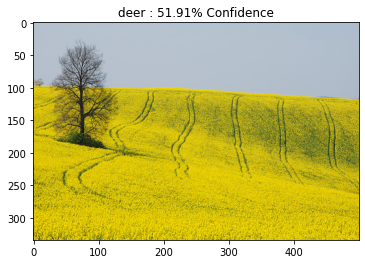

tensor([[0.0042, 0.0048, 0.1027, 0.1565, 0.0733, 0.4337, 0.1819, 0.0331, 0.0055,
         0.0044]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([5])


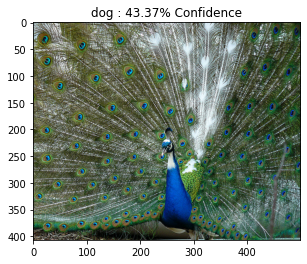

tensor([[0.0041, 0.0059, 0.2407, 0.0958, 0.0106, 0.4878, 0.0214, 0.1181, 0.0005,
         0.0151]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([5])


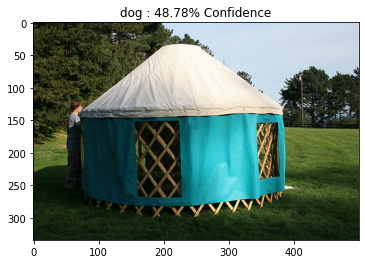

tensor([[0.0126, 0.0149, 0.0159, 0.2395, 0.0019, 0.2718, 0.0085, 0.1208, 0.0058,
         0.3083]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([9])


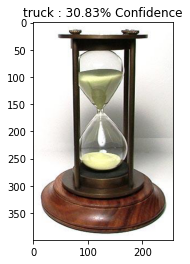

tensor([[0.4509, 0.0058, 0.2611, 0.0365, 0.1196, 0.0169, 0.0102, 0.0190, 0.0696,
         0.0103]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([0])


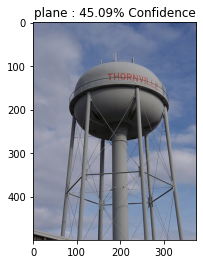

tensor([[0.0042, 0.0275, 0.0311, 0.0541, 0.0417, 0.0710, 0.7033, 0.0383, 0.0096,
         0.0192]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([6])


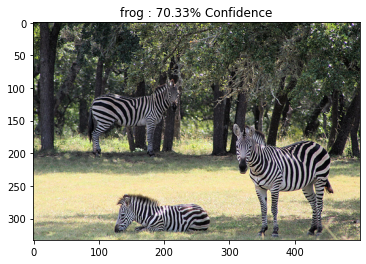

tensor([[0.0076, 0.7653, 0.0020, 0.0018, 0.0017, 0.0009, 0.0587, 0.0015, 0.0028,
         0.1576]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([1])


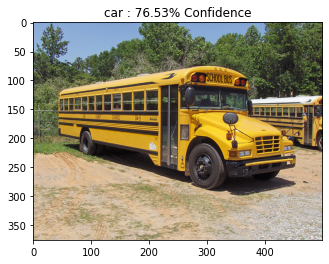

tensor([[0.0022, 0.0012, 0.0461, 0.0885, 0.0374, 0.6826, 0.0117, 0.1266, 0.0022,
         0.0015]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([5])


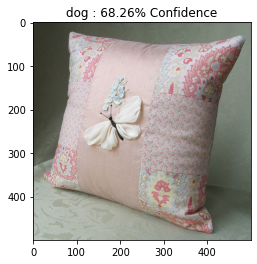

tensor([[0.1786, 0.0402, 0.0734, 0.0569, 0.0210, 0.0356, 0.0069, 0.0363, 0.5008,
         0.0504]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([8])


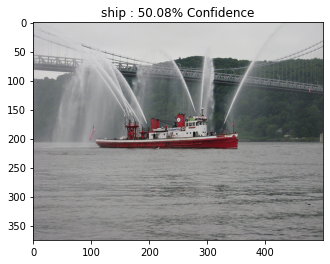

tensor([[0.0012, 0.0041, 0.0141, 0.2267, 0.0170, 0.4083, 0.2680, 0.0471, 0.0008,
         0.0126]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([5])


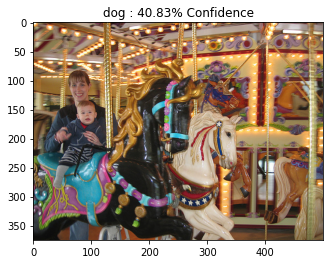

In [92]:
from PIL import Image
import matplotlib.pyplot as plt

net = Net()  # Initialize model
net.load_state_dict(torch.load('/content/drive/My Drive/HKUST/MSBD5012/Assignment/cifar_net.pth'))  # Load pretrained parameters
net.eval()  # Set to eval mode to change behavior of Dropout, BatchNorm

# transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((32,32)), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((32,32)), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Same as for your validation data, e.g. Resize, ToTensor, Normalize, ...
# transform = transforms.Compose([transforms.ToTensor(), transforms.Scale((32,32))])

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

mydataset = []

for i in range(1, 11):
  img = Image.open(f'/content/drive/My Drive/HKUST/MSBD5012/Assignment/images/{i}.png').convert('RGB')  # Load image as PIL.Image
  x = transform(img)  # Preprocess image
  x = x.unsqueeze(0)  # Add batch dimension

  output = net(x)  # Forward pass
  # print(output)
  Softmax = nn.Softmax(dim=1)
  image_prob = Softmax(output)
  print(image_prob)
  pred = torch.argmax(image_prob, 1)  # Get predicted class if multi-class classification
  mydataset.append([x, pred])
  label = int(pred)
  print('Image predicted as', pred)
  class_confidence = torch.max(image_prob)
  plt.figure()
  plt.imshow(img)
  plt.title('{} : {:.2f}% Confidence'.format(classes[label], class_confidence*100))
  plt.show()

tensor([[0.1167, 0.0013, 0.4269, 0.0032, 0.4122, 0.0013, 0.0215, 0.0100, 0.0034,
         0.0036]], grad_fn=<SoftmaxBackward0>)
Image predicted as tensor([6])


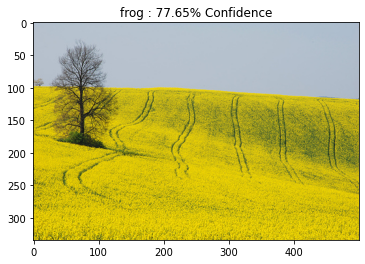

In [17]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((32,32)), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
img = Image.open(f'/content/drive/My Drive/HKUST/MSBD5012/Assignment/images/1.png').convert('RGB')
x = transform(img)  # Preprocess image
x = x.unsqueeze(0)  # Add batch dimension

output = net(x)  # Forward pass
Softmax = nn.Softmax(dim=1)
image_probs = Softmax(output)
print(image_probs)
pred = torch.argmax(image_prob, 1)  # Get predicted class if multi-class classification
image_class = int(pred)
print('Image predicted as', pred)
class_confidence = torch.max(image_prob)
plt.figure()
plt.imshow(img)
plt.title('{} : {:.2f}% Confidence'.format(classes[image_class], class_confidence*100))
plt.show()

### Online method (Pytorch)

In [86]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
state = torch.load('/content/drive/My Drive/HKUST/MSBD5012/Assignment/cifar_net.pth')
net.load_state_dict(state)

<All keys matched successfully>

In [87]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [94]:
def test(model, test_loader, epsilon):

    # Accuracy counter
    correct = 0
    adv_examples = []

    # Loop over all examples in test set
    for data, target in test_loader:

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        Softmax = nn.Softmax(dim=1)
        image_probs = Softmax(output)
        class_confidence = float(torch.max(image_probs)) * 100
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        print('~' * 20, 'Picture without attack','~' * 20)
        plt.figure()
        plt.imshow(tensor_to_PIL(data))
        plt.title('{} : {:.2f}% Confidence'.format(classes[int(init_pred)], class_confidence))
        plt.show()

        # If the initial prediction is wrong, dont bother attacking, just move on
        if init_pred.item() != target.item():
            continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output = model(perturbed_data)
        image_probs = Softmax(output)
        class_confidence = float(torch.max(image_probs)) * 100
        attack_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        print('~' * 20, 'Picture with attack','~' * 20)
        plt.figure()
        plt.imshow(tensor_to_PIL(perturbed_data))
        plt.title('{} : {:.2f}% Confidence'.format(classes[int(attack_pred)], class_confidence))
        plt.show()

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        if final_pred.item() == target.item():
            correct += 1
            # Special case for saving 0 epsilon examples
            if (epsilon == 0) and (len(adv_examples) < 5):
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        else:
            # Save some adv examples for visualization later
            if len(adv_examples) < 5:
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(test_loader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, len(test_loader), final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

In [99]:
epsilons = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

In [90]:
from torchvision import transforms
unloader = transforms.ToPILImage()
def tensor_to_PIL(tensor):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    print(image)
    return image

-------------------------------------------------- epsilon = 0 --------------------------------------------------
~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6565C8F90>


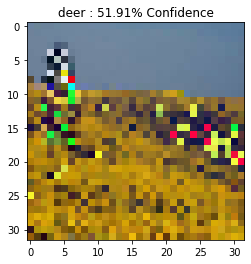

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6588A1450>


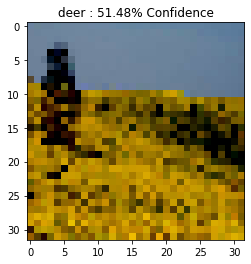

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF658908E50>


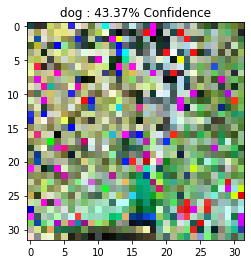

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF658E83090>


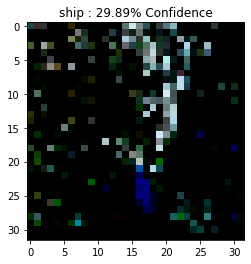

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65883ED10>


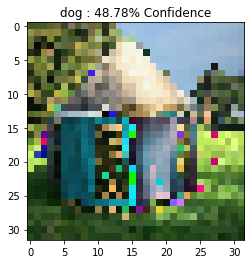

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF658944390>


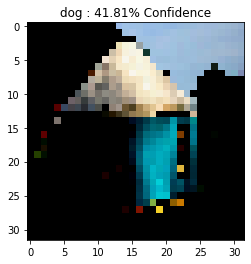

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6587FF750>


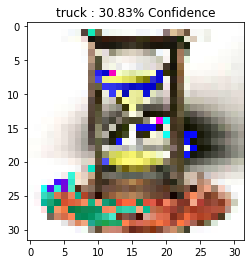

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6531A4390>


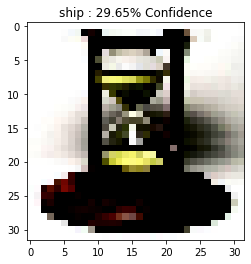

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656C38810>


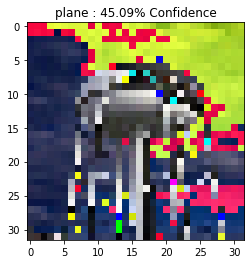

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6522DE890>


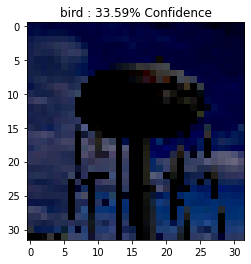

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6CBE1AE50>


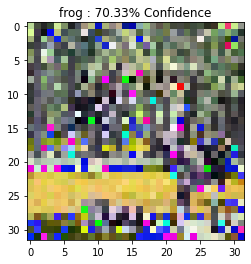

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656D5B550>


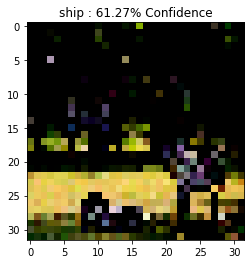

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6589BDB90>


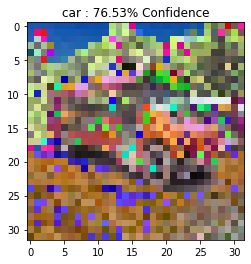

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656521810>


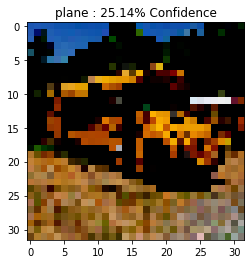

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9200C10>


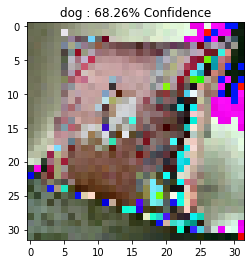

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9615650>


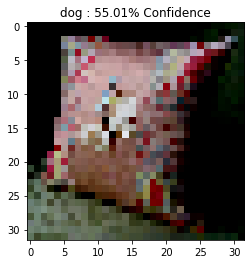

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF651CB0150>


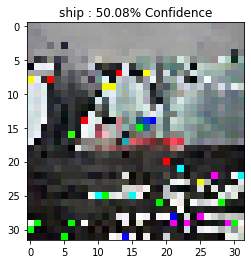

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C95383D0>


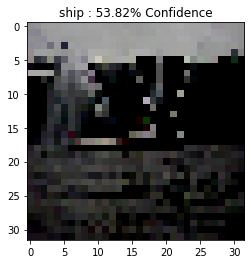

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF651532210>


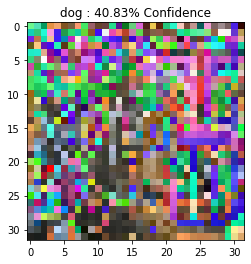

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C96AD150>


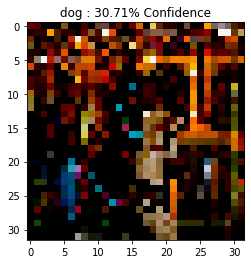

Epsilon: 0	Test Accuracy = 5 / 10 = 0.5
-------------------------------------------------- epsilon = 0.05 --------------------------------------------------
~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656501290>


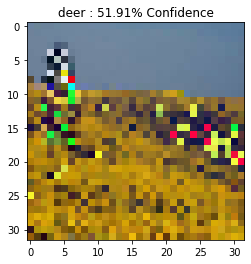

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C97138D0>


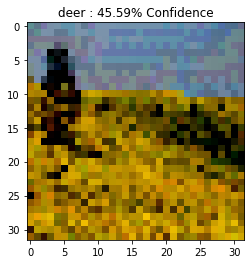

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9491490>


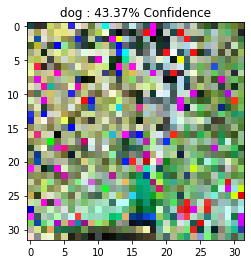

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656640350>


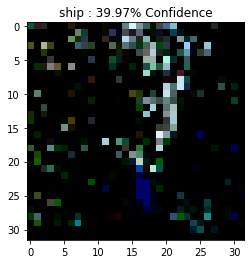

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6564DB590>


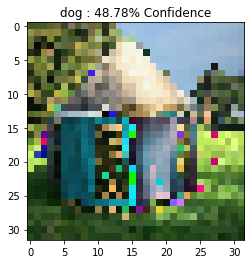

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6563D3D10>


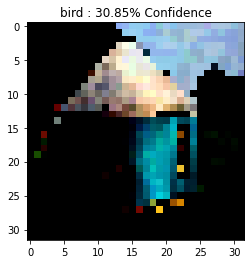

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6564AD3D0>


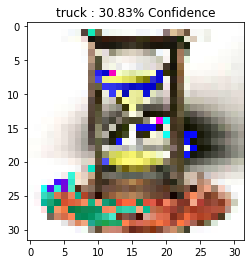

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656265A10>


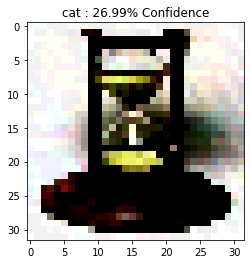

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65623DB50>


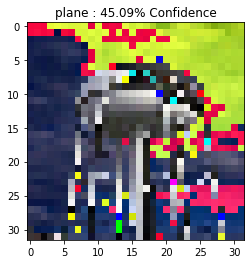

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656214950>


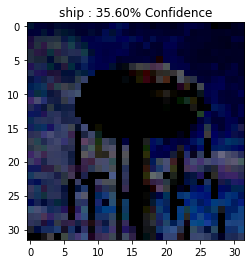

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65619AA90>


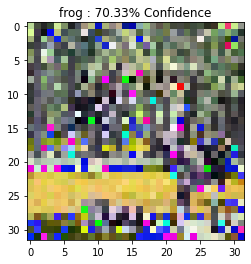

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6560EB910>


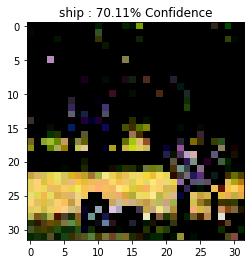

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656193810>


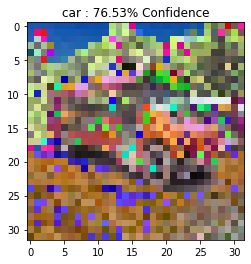

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65653FB90>


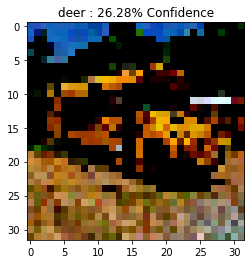

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9829D50>


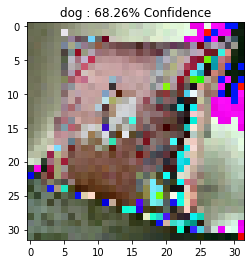

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6522DE210>


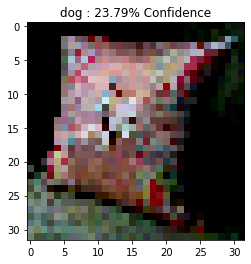

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF653EB2BD0>


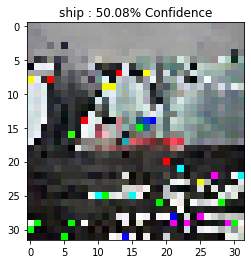

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9971C90>


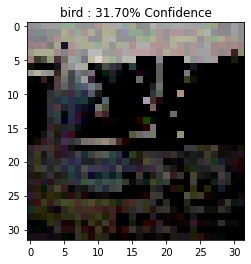

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF658EE4E90>


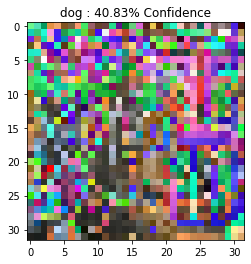

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6588A0390>


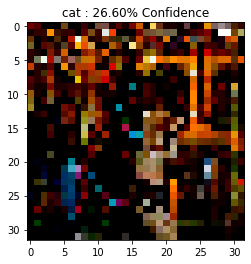

Epsilon: 0.05	Test Accuracy = 2 / 10 = 0.2
-------------------------------------------------- epsilon = 0.1 --------------------------------------------------
~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6588D0D10>


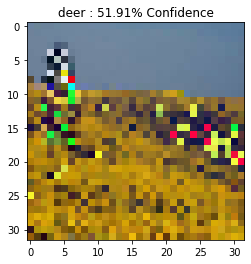

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6589D5690>


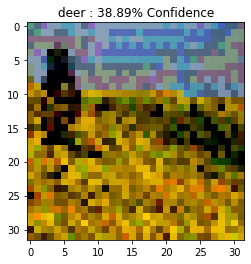

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6590FB850>


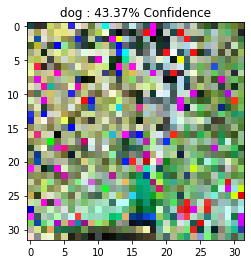

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656649690>


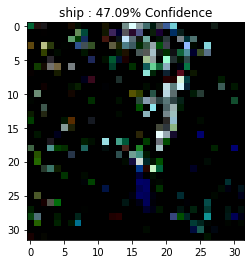

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C987C390>


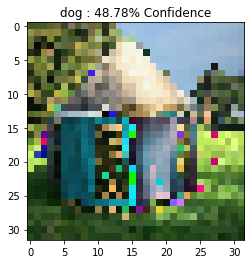

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C99BE250>


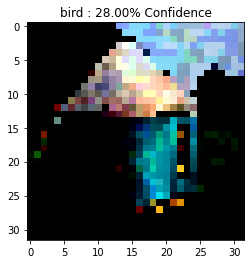

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C99BE290>


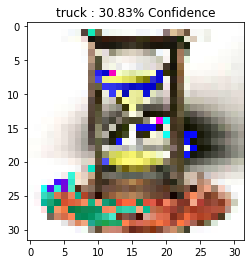

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C956C390>


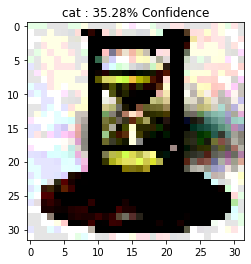

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6566817D0>


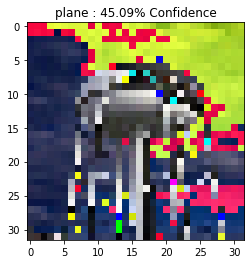

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C981FDD0>


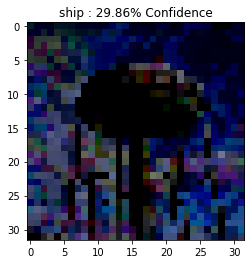

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9669050>


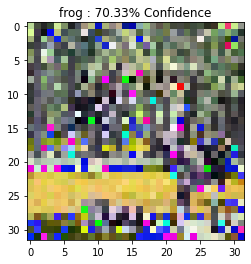

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF658709F50>


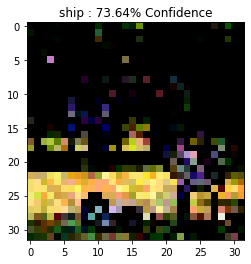

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C960E850>


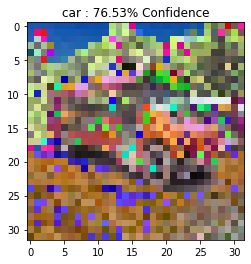

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6586EF550>


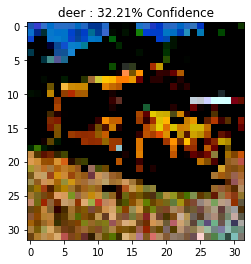

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65659C290>


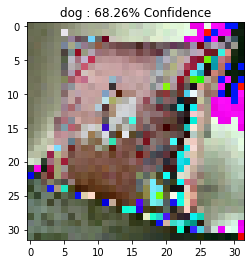

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65150EED0>


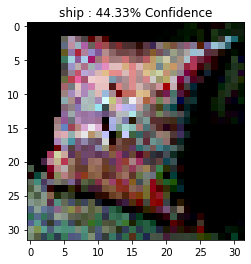

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656643310>


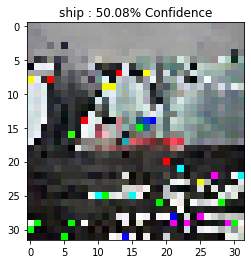

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6565DCCD0>


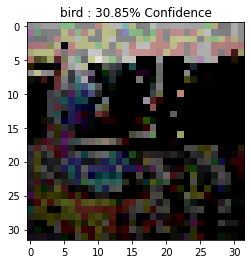

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65659C210>


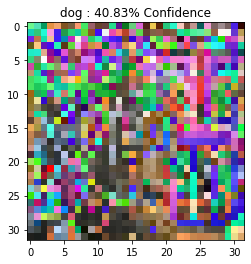

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6564EE650>


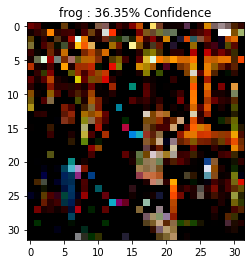

Epsilon: 0.1	Test Accuracy = 1 / 10 = 0.1
-------------------------------------------------- epsilon = 0.15 --------------------------------------------------
~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6561C7550>


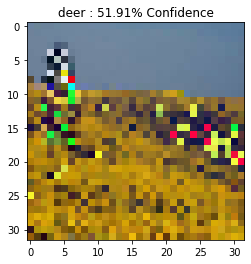

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9913810>


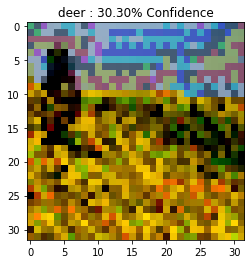

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C97002D0>


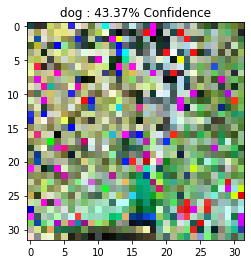

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C98E5FD0>


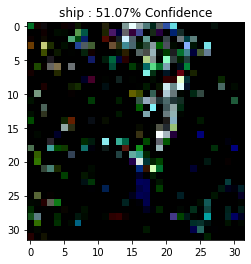

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C97E03D0>


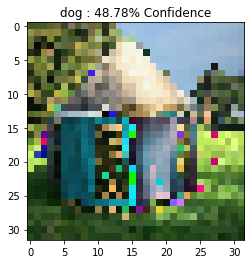

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C97E64D0>


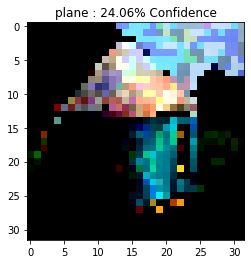

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9765D10>


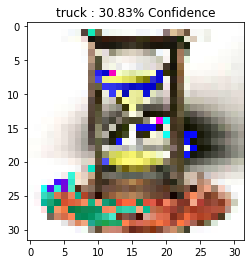

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656059A50>


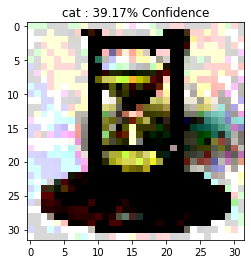

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9764B90>


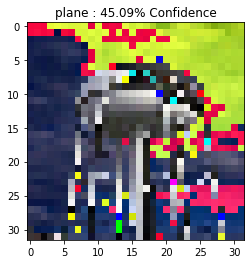

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6566EE7D0>


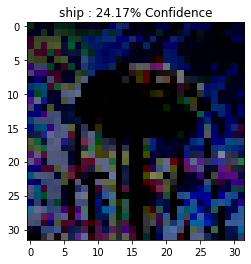

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9997650>


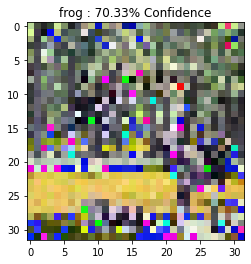

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65606D690>


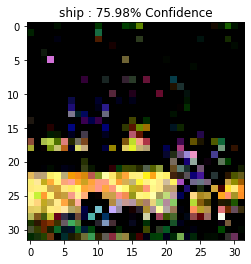

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6587E6450>


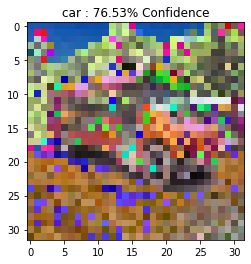

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C983D390>


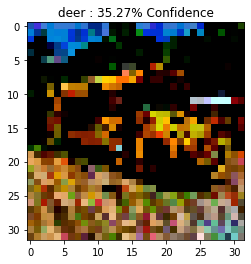

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6588C9F90>


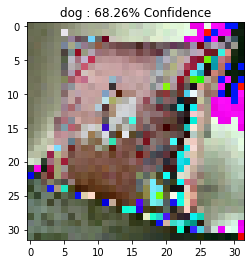

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6CBF4B7D0>


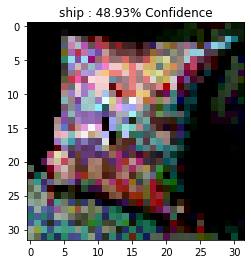

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65898BE50>


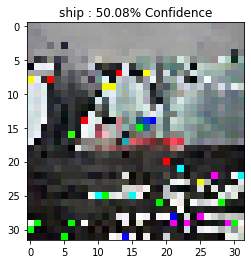

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF658927850>


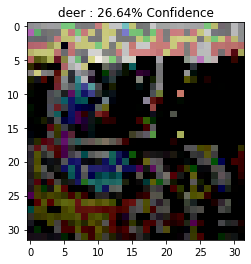

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF653EE2C10>


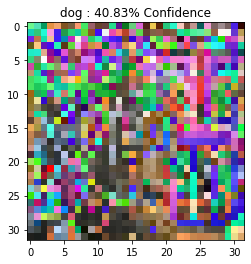

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9991050>


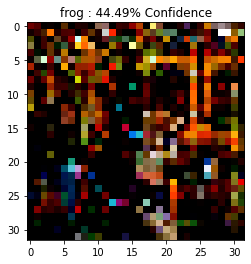

Epsilon: 0.15	Test Accuracy = 1 / 10 = 0.1
-------------------------------------------------- epsilon = 0.2 --------------------------------------------------
~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6589E0BD0>


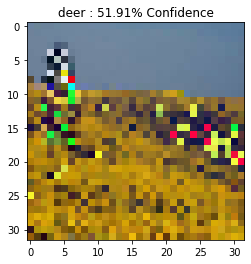

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF653831D10>


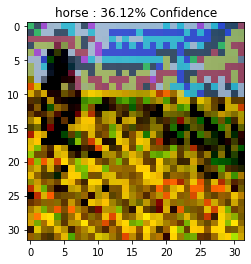

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6538313D0>


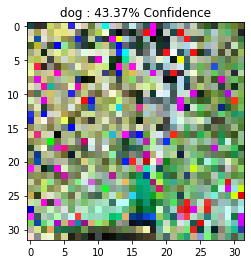

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656D00990>


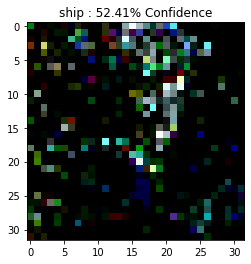

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6589AF6D0>


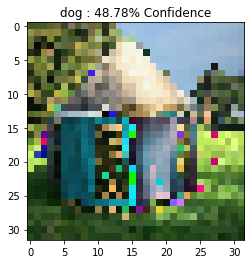

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C97F9190>


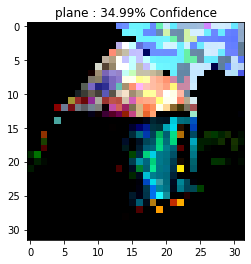

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF658854A10>


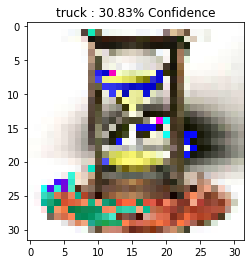

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9653B90>


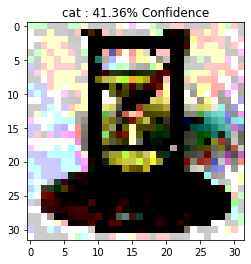

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF650E5D350>


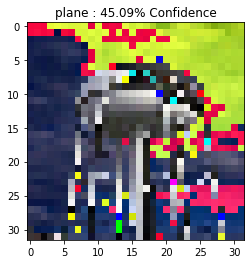

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C979E510>


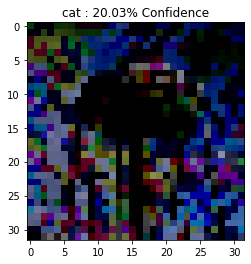

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C94CA710>


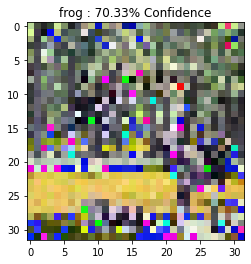

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656C6B810>


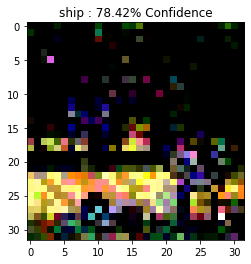

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C952A090>


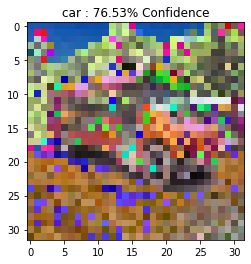

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C96CCE90>


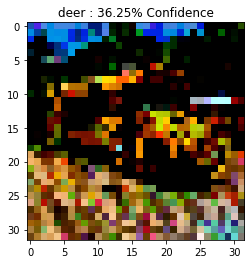

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65663F390>


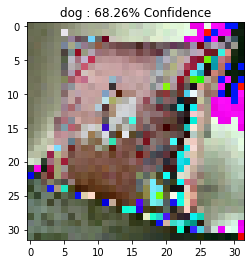

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C96CD6D0>


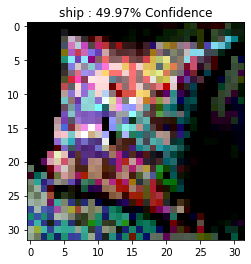

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C99CD9D0>


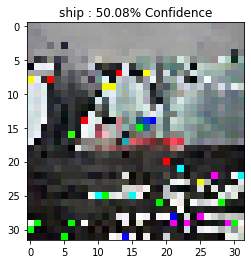

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6565E54D0>


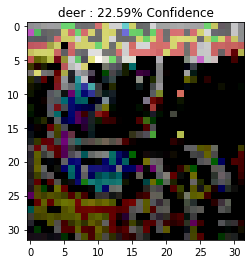

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6562857D0>


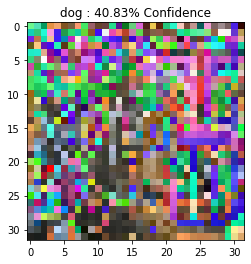

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6564CD990>


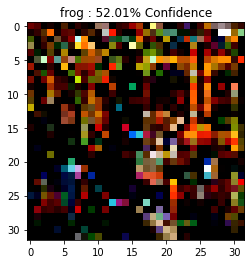

Epsilon: 0.2	Test Accuracy = 0 / 10 = 0.0
-------------------------------------------------- epsilon = 0.25 --------------------------------------------------
~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656028310>


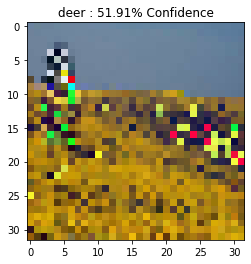

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65620DE10>


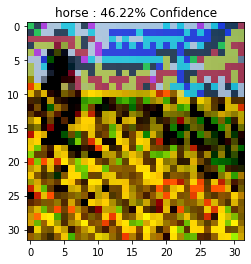

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6562291D0>


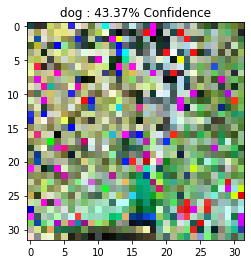

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656131A50>


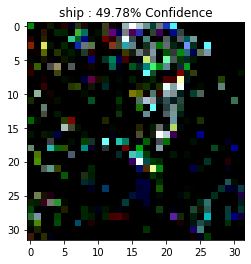

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65624D150>


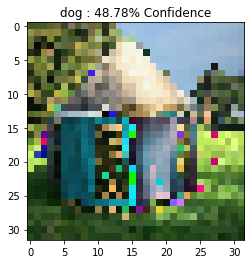

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656021290>


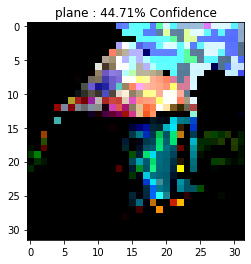

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C99E0A10>


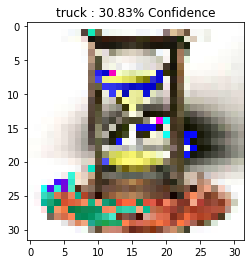

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6586D7790>


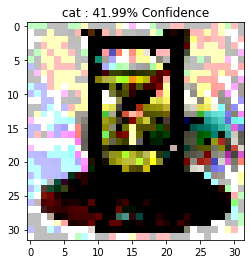

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6586D7410>


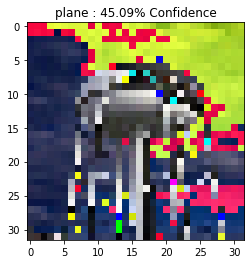

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6588BCA10>


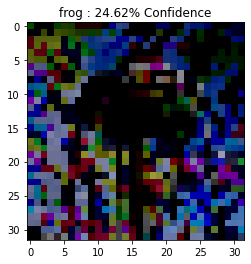

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65890DC90>


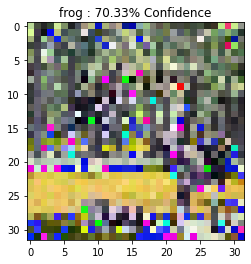

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF658EE4B90>


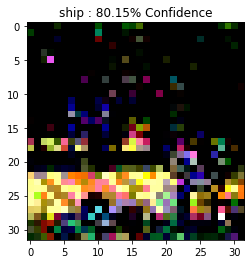

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6589FF210>


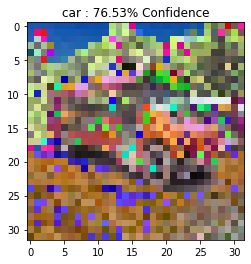

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65884FB90>


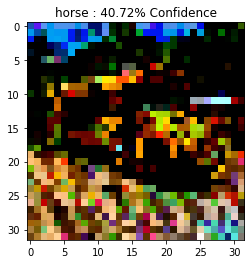

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF658E8E4D0>


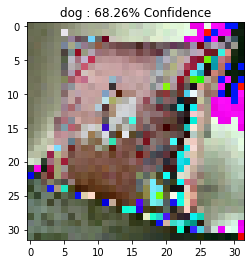

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C94B5590>


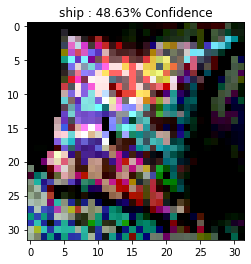

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656649490>


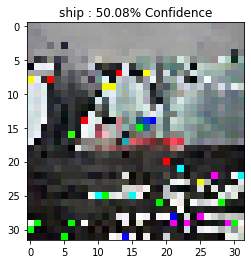

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C98D9AD0>


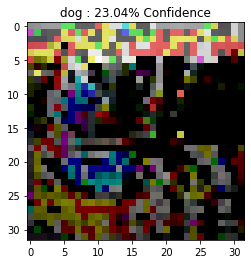

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C94C8150>


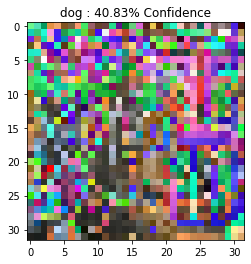

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6531A8FD0>


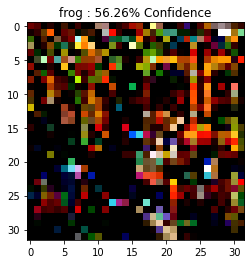

Epsilon: 0.25	Test Accuracy = 0 / 10 = 0.0
-------------------------------------------------- epsilon = 0.3 --------------------------------------------------
~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6587EB690>


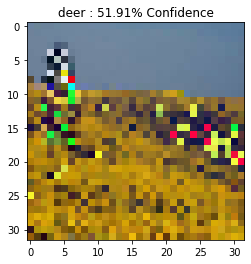

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6589CB090>


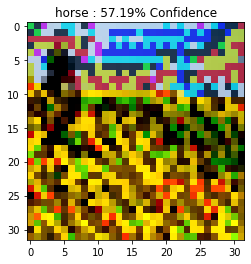

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C958B710>


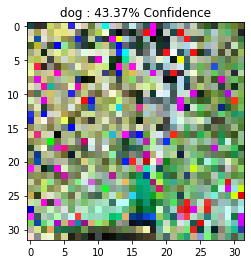

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF650E8D790>


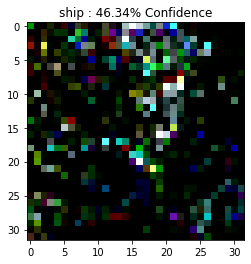

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C91F5050>


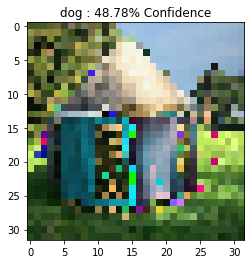

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C91F5E50>


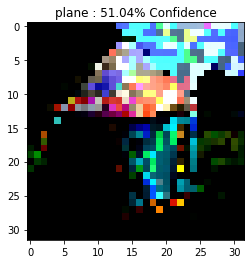

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF652CBEF50>


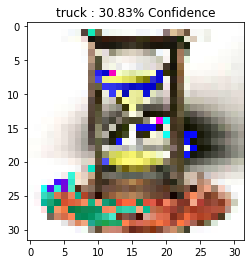

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C9621B50>


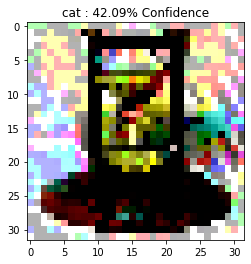

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65664C890>


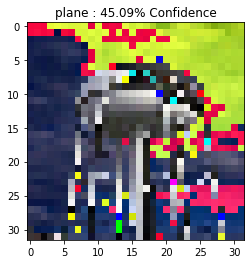

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C947C090>


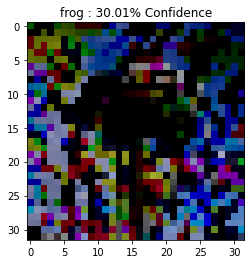

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656C634D0>


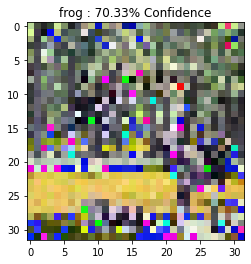

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6C94ACE10>


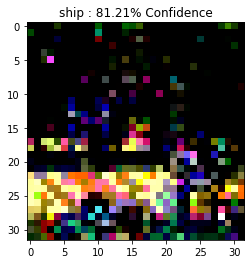

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6565A1150>


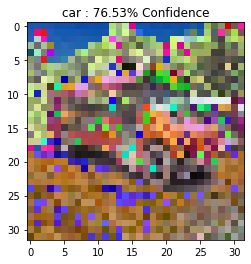

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6561E5910>


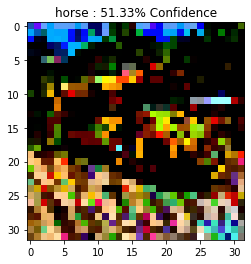

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65629ED10>


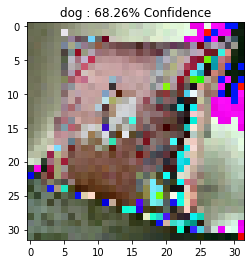

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6561AA6D0>


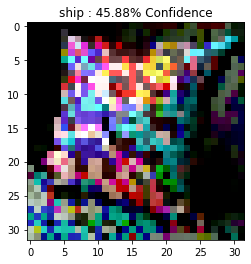

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF656469CD0>


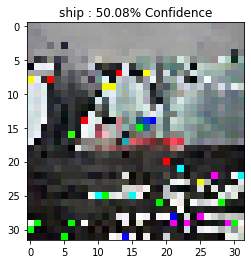

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF6563D1250>


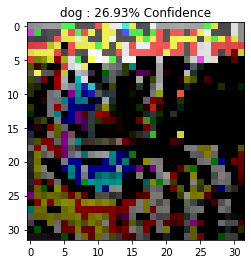

~~~~~~~~~~~~~~~~~~~~ Picture without attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65641F050>


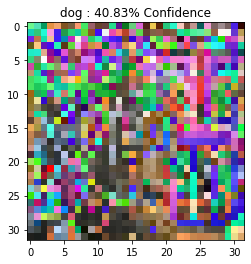

~~~~~~~~~~~~~~~~~~~~ Picture with attack ~~~~~~~~~~~~~~~~~~~~
<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF65638DE50>


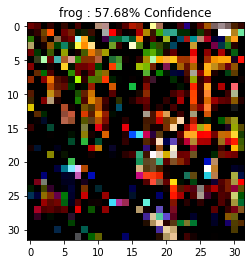

Epsilon: 0.3	Test Accuracy = 0 / 10 = 0.0


In [95]:
accuracies = []
examples = []

# Run test for each epsilon
for eps in epsilons:
    print('-' * 50, f'epsilon = {eps}', '-' * 50)
    acc, ex = test(net, mydataset, eps)
    accuracies.append(acc)
    examples.append(ex)